In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
source = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'
df = pd.read_html(source, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")[0]

# Вивести перші рядки таблиці за допомогою методу head

In [3]:
df.head(5)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


# Визначте кількість рядків та стовпців у датафреймі (атрибут shape)


In [4]:
df.shape

(28, 9)

# Замініть у таблиці значення "—" на значення NaN

In [5]:
df.replace("—", np.nan, inplace=True)
df.head(5)

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,NaN,NaN
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,NaN


# Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [6]:
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

# Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [7]:
df = df.astype({'2014': 'float64', '2019': 'float64'})
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

# Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [8]:
df_columns = df.columns
for columns in df_columns:
    nan_values = (df[columns].isnull().sum()/len(df))*100
    print(f"{columns}: {round(nan_values, 2)} %")

Регіон: 0.0 %
1950: 7.14 %
1960: 3.57 %
1970: 3.57 %
1990: 0.0 %
2000: 0.0 %
2012: 0.0 %
2014: 7.14 %
2019: 14.29 %


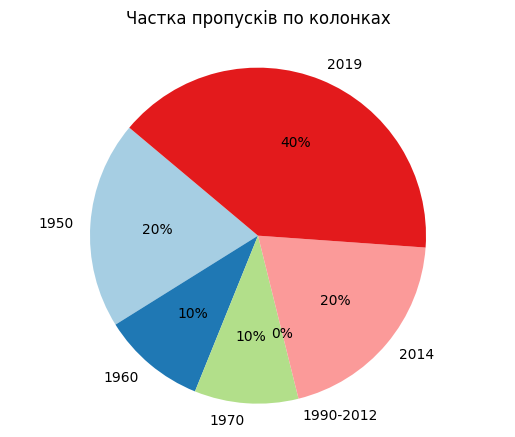

In [9]:
percent_missing = {
    '1950': 7.14,
    '1960': 3.57,
    '1970': 3.57,
    '1990-2012': 0.0,
    '2014': 7.14,
    '2019': 14.29
}

labels = list(percent_missing.keys())
sizes = list(percent_missing.values())

colors = plt.cm.Paired(range(len(labels)))

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', startangle=140)
ax.axis('equal')

plt.title('Частка пропусків по колонках', pad=20)

plt.show()

# Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [10]:
print(df.tail(5))

          Регіон  1950  1960  1970  1990  2000  2012  2014  2019
23   Чернівецька  24.7  21.8  17.0  14.8  10.1  12.8  12.9   9.2
24  Чернігівська  22.0  18.3  12.7  10.8   6.9   9.4   9.0   6.1
25          Київ   NaN  17.4  15.9  12.0   7.3  12.0  12.1  11.0
26   Севастополь   NaN   NaN   NaN  12.5   7.0  12.0   NaN   NaN
27       Україна  22.8  20.5  15.2  12.6   7.8  11.4  11.1   8.1


In [11]:
df = df.drop(df.index[-1])
print(df.tail(5))

          Регіон  1950  1960  1970  1990  2000  2012  2014  2019
22     Черкаська  20.5  17.9  14.4  12.3   7.5  10.0   9.8   6.4
23   Чернівецька  24.7  21.8  17.0  14.8  10.1  12.8  12.9   9.2
24  Чернігівська  22.0  18.3  12.7  10.8   6.9   9.4   9.0   6.1
25          Київ   NaN  17.4  15.9  12.0   7.3  12.0  12.1  11.0
26   Севастополь   NaN   NaN   NaN  12.5   7.0  12.0   NaN   NaN


# Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [12]:
for column in df.columns:
    if df[column].dtype == 'float64':
        column_mean = round(df[column].mean())
        df.fillna({column: column_mean}, inplace=True)
print(df.head(26))

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6  11.0   8.0
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   8.0
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   8.0
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

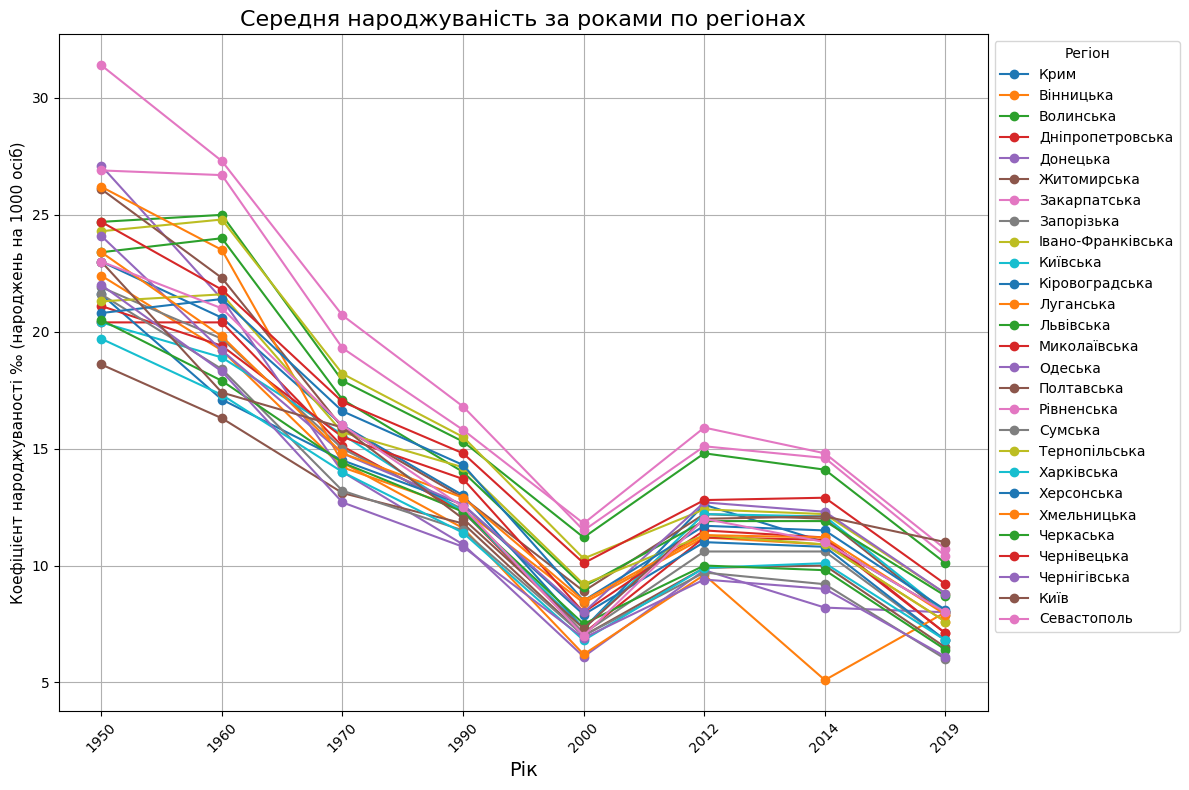

In [13]:
years = df.columns[1:]
plt.figure(figsize=(12, 8))

for index, row in df.iterrows():
    plt.plot(years, row[1:], label=row['Регіон'], marker='o')

plt.xlabel('Рік', fontsize=14)
plt.ylabel('Коефіцієнт народжуваності ‰ (народжень на 1000 осіб)', fontsize=11)
plt.title('Середня народжуваність за роками по регіонах', fontsize=16)
plt.xticks(rotation=45)
plt.legend(title='Регіон', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [14]:
average = df["2019"].mean()
all_2019 = df.groupby("Регіон")["2019"].sum()
result = all_2019[all_2019 > average]
print(result)

Регіон
Івано-Франківська     8.8
Волинська            10.1
Закарпатська         10.4
Київ                 11.0
Львівська             8.7
Одеська               8.8
Рівненська           10.7
Херсонська            8.1
Чернівецька           9.2
Name: 2019, dtype: float64


# У якому регіоні була найвища народжуваність у 2014 році?


In [15]:
max_value = df["2014"].max()
result = df[df["2014"] == max_value]["Регіон"].iloc[0]
print(result)

Рівненська


# Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

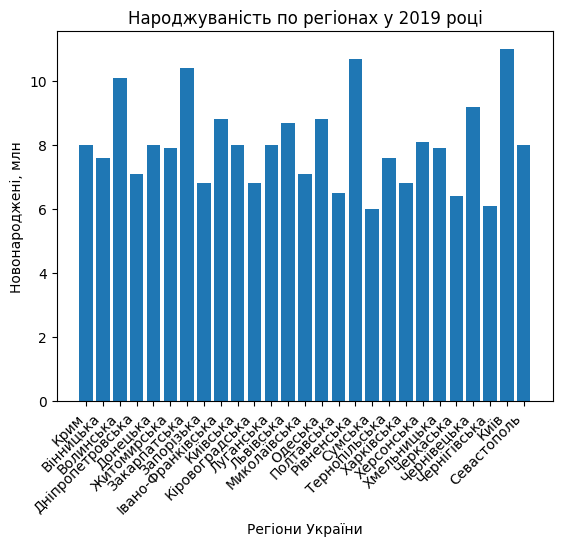

In [16]:
plt.bar(df['Регіон'], df['2019'])

plt.title('Народжуваність по регіонах у 2019 році')
plt.xlabel('Регіони України')
plt.ylabel('Новонароджені, млн')

plt.xticks(rotation=45, ha="right")

plt.show()